In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix

In [2]:
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

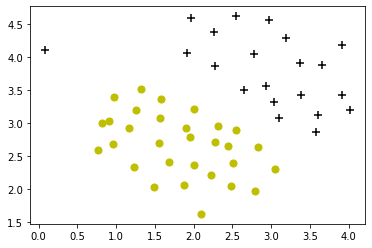

In [3]:
for i in range(len(y)):
    if(y[i] == 0):
        plt.scatter(X[i,0], X[i,1], color = 'y', marker = 'o', s = 50)
    else:
        plt.scatter(X[i,0], X[i,1], color = 'k', marker = '+', s = 50)

In [4]:
from sklearn.svm import SVC
model = SVC(C = 1.0, kernel = 'linear')
model.fit(X,np.ravel(y))

SVC(kernel='linear')

In [5]:
print(model.score(X, y)*100,"%")

98.0392156862745 %


## Plotting using mlxtend (Method - I)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:275: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


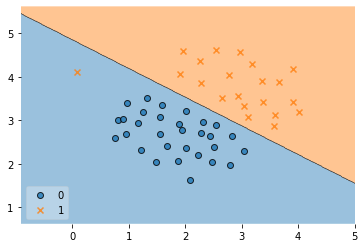

In [6]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.ravel(), clf = model, legend = 3, markers = 'ox', colors='#1f77b4,#ff7f0e')
plt.show()

## Plotting from Scratch (Method - II)

In [130]:
def plot_decision_boundary(X, y, step, classifier, plot_size):

    plt.figure(figsize=(8,6))

    for i in range(len(y)):
        if(y[i] == 0):
            plt.scatter(X[i,0], X[i,1], color = 'y', marker = 'o', s = plot_size)
        else:
            plt.scatter(X[i,0], X[i,1], color = 'k', marker = '+', s = plot_size)
            
    x1_min, x1_max = X[:, 0].min()-0.25, X[:, 0].max()+0.25
    x2_min, x2_max = X[:, 1].min()-0.25, X[:, 1].max()+0.25

    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors = '#1f77b4', linewidths = 0.7)
    plt.show()

    return None

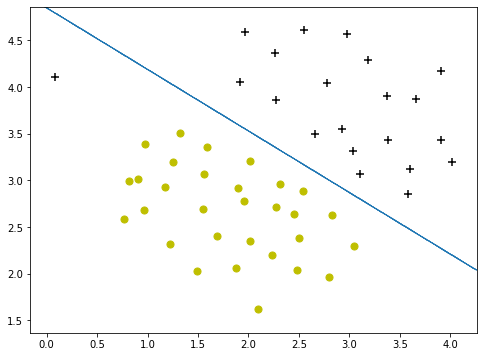

In [8]:
plot_decision_boundary(X, y, 0.005, model, 50)

## At C = 100

In [9]:
model1 = SVC(C = 100.0, kernel = 'linear')
model1.fit(X,np.ravel(y))

SVC(C=100.0, kernel='linear')

In [10]:
print(model1.score(X, y)*100,"%")

100.0 %


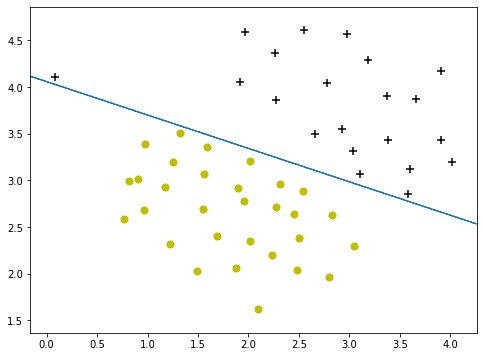

In [11]:
plot_decision_boundary(X, y, 0.005, model1, 50)

## Using Gaussian Kernel (RBF)

In [12]:
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

In [13]:
model_rbf = SVC(C = 100, kernel = 'rbf', gamma = 40)
model_rbf.fit(X2,np.ravel(y2))

SVC(C=100, gamma=40)

In [14]:
print(model_rbf.score(X2, y2)*100,"%")

99.65237543453071 %


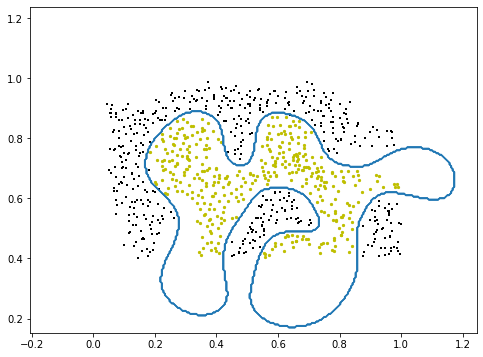

In [15]:
plot_decision_boundary(X2, y2, 0.005, model_rbf, 5)

## Mat - 3

In [20]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]

X3_val = mat3["Xval"]
y3_val = mat3["yval"]

In [85]:
model2 = SVC(C = 30, kernel = 'rbf')
model2.fit(X,np.ravel(y))

SVC(C=30)

In [86]:
print(model2.score(X3, y3)*100,"%")

50.23696682464455 %


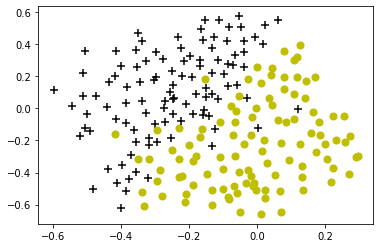

In [87]:
for i in range(len(y3)):
    if(y3[i] == 0):
        plt.scatter(X3[i,0], X3[i,1], color = 'y', marker = 'o', s = 50)
    else:
        plt.scatter(X3[i,0], X3[i,1], color = 'k', marker = '+', s = 50)

In [124]:
def CandGamma(X, y, X_val, y_val, value_set):
    ref_score = 0
    final_C = 0
    final_gamma = 0

    for i in value_set:
        C = i

        for j in value_set:
            gamma = 1/j

            clf = SVC(C = C, gamma = gamma)
            clf.fit(X, y)

            predict = clf.predict(X_val)
            score = clf.score(X_val, y_val)

            if (ref_score < score):
                ref_score = score
                final_C = C
                final_gamma = gamma
            else:
                continue        
    return final_C, final_gamma

In [125]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = CandGamma(X3, y3.ravel(), X3_val, y3_val.ravel(),vals)
clf1 = SVC(C=C,gamma=gamma)
clf1.fit(X3,y3.ravel())

SVC(C=0.3, gamma=100.0)

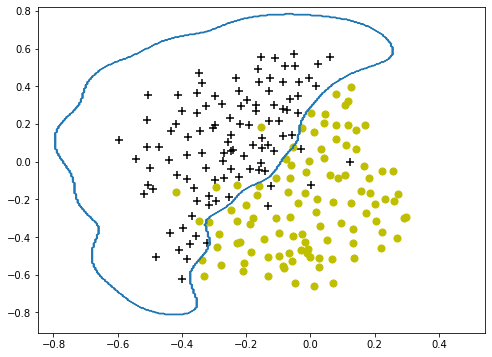

In [131]:
plot_decision_boundary(X3, y3, 0.005, clf1, 50)

## Spam Classificiation

In [420]:
import re
from nltk.stem import PorterStemmer
from nltk import word_tokenize

ps = PorterStemmer()

file_sample = open("emailSample1.txt","r").read()
vocab_sample = open("vocab.txt","r").read()

In [421]:
vocab_sample = vocab_sample.split("\n")[:-1]

vocab_dict = {}

for i in vocab_sample:
    value, key = i.split("\t")[:]
    vocab_dict[key] = value

In [422]:
file_sample

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [430]:
def clean_email(email_file, vocab_dict):

    email_file = email_file.lower()

    email_file = re.sub("[https|https]://[^\s]*", "httpaddr", email_file)

    email_file = re.sub("[^\s]+@[^\s]+", "emailaddr", email_file)

    email_file = re.sub("[0-9]+", "number", email_file)

    email_file = re.sub("[$]+", "dollar", email_file)

    email_file =  re.sub(r'[@$/\\#,-:&*+=\[\]?!(){}\'\">_<;%]+', '', 
                            email_file)
    ps = PorterStemmer()

    email_file = [ps.stem(w) for w in email_file.split(" ")]
    email_file = " ".join(email_file)

    word = word_tokenize(email_file)

    word_index = []

    for char in email_file.split():
        if len(char) > 1 and char in vocab_dict:
            word_index.append(int(vocab_dict[char]))

    return word_index

In [462]:
w_index = clean_email(file_sample, vocab_dict)

In [454]:
def feature_extract(word_index, vocab_dict):

    m = len(vocab_dict)
    feature_vector = np.zeros((m,1))
    
    for i in word_index:
        feature_vector[i] = 1

    return feature_vector

In [456]:
email_features = feature_extract(w_index, vocab_dict)

In [468]:
spam_mat = loadmat("spamTrain.mat")
X_train = spam_mat["X"]
y_train = spam_mat["y"]

In [470]:
email_SVM = SVC(C = 0.1, kernel = "linear")
email_SVM.fit(X_train, y_train.ravel())

SVC(C=0.1, kernel='linear')

In [479]:
print(email_SVM.score(X_train, y_train)*100, "%")

99.825 %


In [494]:
spam_test_mat = loadmat("spamTest.mat")
X_test = spam_test_mat["Xtest"]
y_test = spam_test_mat["ytest"]

In [495]:
print(email_SVM.score(X_test,y_test.ravel())*100,"%")

98.9 %
